In [2]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/tanishgupta26/famous-personalities-image-dataset"
od.download(dataset_url)


Skipping, found downloaded files in "./famous-personalities-image-dataset" (use force=True to force download)


In [4]:
import os
dataset_dir = '/content/famous-personalities-image-dataset/cropped/cropped'
os.listdir(dataset_dir)

['Dalai_Lama',
 'Barack_Obama',
 'Vikas_Khanna',
 'Narendra_Modi',
 'Bill_Gates',
 'Anushka_Sharma',
 'Indira_Nooyi',
 'Sundar_Pichai',
 'Melinda_Gates',
 'Virat_Kohli']

In [5]:
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
RANDOM_STATE = 0
path_to_cr_data =dataset_dir 
img_dirs = []
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['/content/famous-personalities-image-dataset/cropped/cropped/Dalai_Lama',
 '/content/famous-personalities-image-dataset/cropped/cropped/Barack_Obama',
 '/content/famous-personalities-image-dataset/cropped/cropped/Vikas_Khanna',
 '/content/famous-personalities-image-dataset/cropped/cropped/Narendra_Modi',
 '/content/famous-personalities-image-dataset/cropped/cropped/Bill_Gates',
 '/content/famous-personalities-image-dataset/cropped/cropped/Anushka_Sharma',
 '/content/famous-personalities-image-dataset/cropped/cropped/Indira_Nooyi',
 '/content/famous-personalities-image-dataset/cropped/cropped/Sundar_Pichai',
 '/content/famous-personalities-image-dataset/cropped/cropped/Melinda_Gates',
 '/content/famous-personalities-image-dataset/cropped/cropped/Virat_Kohli']

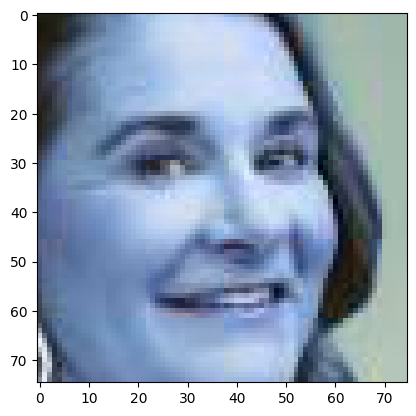

In [7]:
img = cv2.imread('/content/famous-personalities-image-dataset/cropped/cropped/Melinda_Gates/mellindagates193.png')
plt.imshow(img)

In [8]:
img.shape

(75, 75, 3)

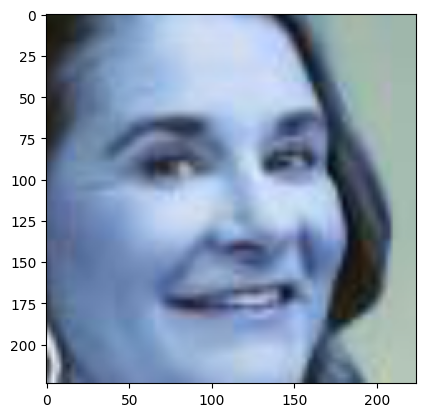

In [9]:
resized_raw_img = cv2.resize(img, (224, 224))
plt.imshow(resized_raw_img)

In [ ]:
celebrity_file_names_dict={}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

In [11]:
for k, v in celebrity_file_names_dict.items():
  print(k, len(v))

Dalai_Lama 231
Barack_Obama 338
Vikas_Khanna 294
Narendra_Modi 224
Bill_Gates 217
Anushka_Sharma 258
Indira_Nooyi 256
Sundar_Pichai 228
Melinda_Gates 394
Virat_Kohli 276


In [12]:
img_list_height = []
img_list_width = []
for k, v in celebrity_file_names_dict.items():
    for im in v:
        img = cv2.imread(im)
        img_list_height.append(img.shape[0])
        img_list_width.append(img.shape[1])

Text(0.5, 1.0, 'count vs image height')

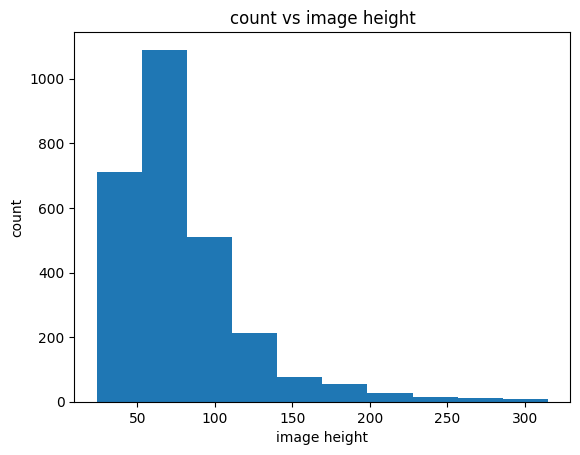

In [ ]:
plt.hist(img_list_height)
plt.xlabel('image height')
plt.ylabel('count')
plt.title('count vs image height')

Text(0.5, 1.0, 'count vs image width')

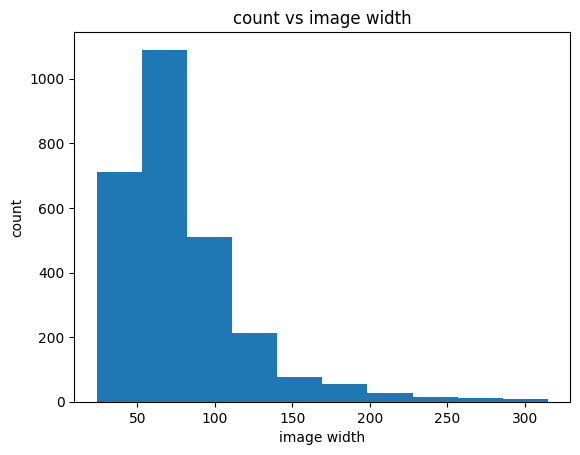

In [14]:
plt.hist(img_list_width)
plt.xlabel('image width')
plt.ylabel('count')
plt.title('count vs image width')

In [15]:
del img_list_height, img_list_width

In [16]:
IMG_SIZE = [224,224]

In [17]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Dalai_Lama': 0,
 'Barack_Obama': 1,
 'Vikas_Khanna': 2,
 'Narendra_Modi': 3,
 'Bill_Gates': 4,
 'Anushka_Sharma': 5,
 'Indira_Nooyi': 6,
 'Sundar_Pichai': 7,
 'Melinda_Gates': 8,
 'Virat_Kohli': 9}

In [18]:
inv_dict = dict(zip(class_dict.values(), class_dict.keys())) 
inv_dict

{0: 'Dalai_Lama',
 1: 'Barack_Obama',
 2: 'Vikas_Khanna',
 3: 'Narendra_Modi',
 4: 'Bill_Gates',
 5: 'Anushka_Sharma',
 6: 'Indira_Nooyi',
 7: 'Sundar_Pichai',
 8: 'Melinda_Gates',
 9: 'Virat_Kohli'}

In [19]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        X.append(img)
        y.append(class_dict[celebrity_name])

In [20]:
X_train_temp, X_test_temp, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=RANDOM_STATE)

In [21]:
del X,y

In [22]:
Total_Pixels = 0
B_sum  = 0
G_sum = 0
R_sum = 0

for img in X_train_temp:
    Total_Pixels = Total_Pixels  + img.shape[0]*img.shape[1]
    (B,G,R) = cv2.split(img)
    B_sum = B_sum + B.sum()
    G_sum = G_sum + G.sum()
    R_sum = R_sum + R.sum()
        
        
B_mean = B_sum/Total_Pixels
G_mean = G_sum/Total_Pixels
R_mean = R_sum/Total_Pixels

In [23]:
X_train = []
for img in X_train_temp:
    if img is not None:
        img_resized = cv2.resize(img, (IMG_SIZE[0], IMG_SIZE[1]))
        (B,G,R) = cv2.split(img_resized)
        B = B - B_mean
        G = G - G_mean
        R = R - R_mean
        img_preprocessed = cv2.merge([B, G, R])
        X_train.append(img_preprocessed)
           


In [24]:
X_test = []
for img in X_test_temp:
    if img is not None:
        img_resized = cv2.resize(img, (IMG_SIZE[0], IMG_SIZE[1]))
        (B,G,R) = cv2.split(img_resized)
        B = B - B_mean
        G = G - G_mean
        R = R - R_mean
        img_preprocessed = cv2.merge([B, G, R])
        X_test.append(img_preprocessed)
            
    

In [ ]:
del X_train_temp, X_test_temp, B, G, R, B_mean, G_mean, R_mean, img_resized, img_preprocessed, Total_Pixels

In [26]:
len(X_train)

2172

In [27]:
len(X_test)

544

In [28]:
len(y_train)

2172

In [29]:
import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], 3)
N_CLASSES = 10
OPTIMIZER = Adam(learning_rate=0.0001)
LOSS_FUNC = 'sparse_categorical_crossentropy'
METRICS = ['accuracy']
EPOCHS = 10
BATCH_SIZE = 32
OUTPUT_ACTIVATION = 'softmax'

In [31]:
def create_model(input_shape, n_classes, optimizer, loss_func, metrics, output_activation, freeze):
    
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    if freeze > 0:
        for layer in conv_base.layers[:-freeze]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

   
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation=output_activation)(top_model)
    
    
    model = Model(inputs=conv_base.input, outputs=output_layer)

    model.compile(optimizer=optimizer, 
                  loss=loss_func,
                  metrics=metrics)
    
    return model

In [33]:
def training_accuracy_plot(history,model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()
    

In [34]:
def training_accuracy_plot(history,model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()
    

In [35]:
def training_loss_plot(history,model):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()
    

In [36]:
vgg_model = create_model(INPUT_SHAPE, N_CLASSES, OPTIMIZER, LOSS_FUNC, METRICS, OUTPUT_ACTIVATION,0)

In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [38]:
history = vgg_model.fit(X_train, y_train, batch_size=BATCH_SIZE, validation_split=0.15,epochs=EPOCHS, shuffle=True)

58/58 [==============================] - 1244s 21s/step - loss: 4.8340 - accuracy: 0.7351 - val_loss: 0.7227 - val_accuracy: 0.9110


In [39]:
vgg_model.evaluate(X_test, y_test)

17/17 [==============================] - 277s 16s/step - loss: 0.6670 - accuracy: 0.9044


[0.6669877171516418, 0.904411792755127]

In [40]:
y_pred = vgg_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

17/17 [==============================] - 279s 16s/step


In [42]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        44
           1       0.90      0.93      0.91        68
           2       0.87      0.83      0.85        54
           3       1.00      0.95      0.97        55
           4       0.95      0.93      0.94        41
           5       0.86      0.75      0.80        48
           6       0.80      0.94      0.86        50
           7       0.98      0.98      0.98        43
           8       0.97      0.83      0.89        76
           9       0.98      0.95      0.97        65

    accuracy                           0.90       544
   macro avg       0.91      0.91      0.90       544
weighted avg       0.91      0.90      0.90       544



In [45]:
y_pred[0]

array([1.4016806e-03, 8.5216155e-04, 9.8636824e-01, 2.2015849e-06,
       4.5224682e-11, 1.0659260e-02, 3.5166688e-04, 2.1359622e-10,
       3.5444714e-04, 1.0305988e-05], dtype=float32)

In [46]:
inv_dict[np.argmax(y_pred[0])]

'Vikas_Khanna'

In [47]:
y_test[0]

3

In [48]:
inv_dict[y_test[0]]

'Narendra_Modi'

In [49]:
del vgg_model, history

# HYPER PARAMETER TUNING

In [50]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [51]:
del y_train, y_test

In [52]:
LOSS_FUNC = 'categorical_crossentropy'

In [53]:
vgg_model_1 = create_model(INPUT_SHAPE, N_CLASSES, OPTIMIZER, LOSS_FUNC, METRICS, OUTPUT_ACTIVATION,0)

In [54]:
history_1 = vgg_model_1.fit(X_train, y_train_cat, batch_size=BATCH_SIZE, validation_split=0.15,epochs=EPOCHS, shuffle=True)

KeyError: ignored

In [55]:
training_accuracy_plot(history_1,vgg_model_1)

NameError: ignored

In [ ]:
training_loss_plot(history_1,vgg_model_1)

In [56]:
vgg_model_1.evaluate(X_test, y_test_cat)

17/17 [==============================] - 295s 17s/step - loss: 11.0921 - accuracy: 0.1011


[11.09205150604248, 0.10110294073820114]

In [ ]:
del history_1, vgg_model_1

In [ ]:
LOSS_FUNC = 'kullback_leibler_divergence'
OPTIMIZER = Adam(learning_rate=0.0001)

In [ ]:
vgg_model_2 = create_model(INPUT_SHAPE, N_CLASSES, OPTIMIZER, LOSS_FUNC, METRICS, OUTPUT_ACTIVATION,0)

In [ ]:
history_2 = vgg_model_2.fit(X_train, y_train_cat, batch_size=BATCH_SIZE, validation_split=0.15,epochs=EPOCHS, shuffle=True)

In [ ]:
training_accuracy_plot(history_2,vgg_model_2)

In [ ]:
training_loss_plot(history_2,vgg_model_2)

In [ ]:
training_loss_plot(history_2,vgg_model_2)

In [ ]:
LOSS_FUNC = 'categorical_hinge'
OUTPUT_ACTIVATION = 'linear'

In [ ]:
vgg_model_3 = create_model(INPUT_SHAPE, N_CLASSES, OPTIMIZER, LOSS_FUNC, METRICS, OUTPUT_ACTIVATION,0)

In [ ]:
training_accuracy_plot(history_3,vgg_model_3)

In [ ]:
training_loss_plot(history_3,vgg_model_3)

In [ ]:
vgg_model_3.evaluate(X_test, y_test_cat)